In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

#Loading data 
climbingData = pd.read_csv('ClimbingData.csv', usecols=['Grade','Attempts','NumMoves','MovesCompleted','TimeRested','ClimbLocation'], index_col=False).to_numpy()
attemptsPerGrade = {}
attemptsPerLoc = {}
attemptsPerGrade_completed = {}
attemptsPerLoc_completed = {}

for row in climbingData:
    #Determining the number of attempts per grade and location
    if not (row[0]==None or np.isnan(row[1])):
        if row[0] in attemptsPerGrade:
            attemptsPerGrade[row[0]] += row[1]
        else:
            attemptsPerGrade[row[0]] = row[1]

        if row[5] in attemptsPerLoc:
            attemptsPerLoc[row[5]] += row[1]
        else:
            attemptsPerLoc[row[5]] = row[1]

    #Determining the number of attempts per grade and location for completed climbs
    if not (row[0]==None or np.isnan(row[1])) and row[3]==100:
        
        if row[0] in attemptsPerGrade_completed:
            attemptsPerGrade_completed[row[0]] += row[1]
        else:
            attemptsPerGrade_completed[row[0]] = row[1]
        
        if row[5] in attemptsPerLoc_completed:
            attemptsPerLoc_completed[row[5]] += row[1]
        else:
            attemptsPerLoc_completed[row[5]] = row[1]


grades = list(attemptsPerGrade.keys())
locations = list(attemptsPerLoc.keys())

#Making sure the grades and locations are consistent 
print(grades,"\n",locations)
total_attempts = [attemptsPerGrade[grade] for grade in grades]

grades_completed = list(attemptsPerGrade_completed.keys())
locationsOrdered = list(attemptsPerLoc_completed.keys())
totalAttempts_completed = [attemptsPerGrade_completed[grade] for grade in grades_completed]

#Setting specific orders for the plots
gradeOrder_completed = ['v1', 'v1-3', 'v3-5', 'v5-7']
gradeOrder = ['v1', 'v1-3', 'v3-5', 'v5-7', 'v7-9']
locationsOrdered = ['left slab', 'batcave', 'right slab', 'cove', 'corner pub', 'island']


['v1-3', 'v5-7', 'v3-5', 'v7-9', 'v1'] 
 ['batcave', 'left slab', 'island', 'cove', 'corner pub', 'right slab']


{'v1-3': 20.0, 'v5-7': 78.0, 'v3-5': 50.0, 'v7-9': 1.0, 'v1': 1.0}
{'v1-3': 20.0, 'v3-5': 15.0, 'v5-7': 4.0, 'v1': 1.0}


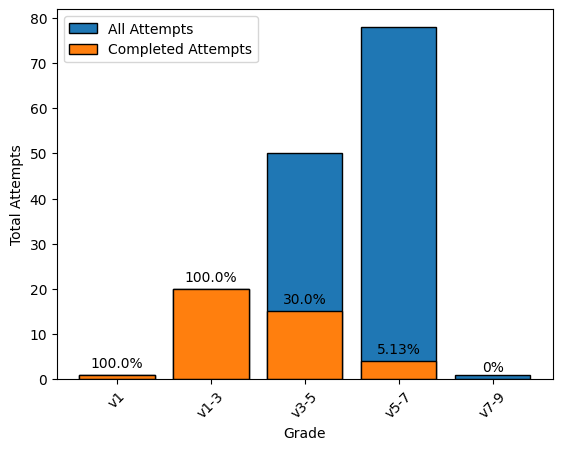

In [483]:
#Plotting the number of attempts per grade with the percentage of completed attempts
plt.bar(gradeOrder, [attemptsPerGrade[grade] for grade in gradeOrder], edgecolor='black', label="All Attempts")
plt.bar(gradeOrder_completed, [attemptsPerGrade_completed[grade] for grade in gradeOrder_completed], edgecolor='black', label="Completed Attempts")
print(attemptsPerGrade)
print(attemptsPerGrade_completed)
for i in range(len(gradeOrder)):
    try:
        plt.text(i, attemptsPerGrade_completed[gradeOrder[i]]+1, f"{round(attemptsPerGrade_completed[gradeOrder[i]]/attemptsPerGrade[gradeOrder[i]]*100,2)}%", ha='center', va='bottom', color='black')
    except: 
        plt.text(i, 1, f"0%", ha='center', va='bottom', color='black')
plt.xlabel('Grade')
plt.ylabel('Total Attempts')
plt.xticks(rotation=45)
plt.legend()
plt.show()

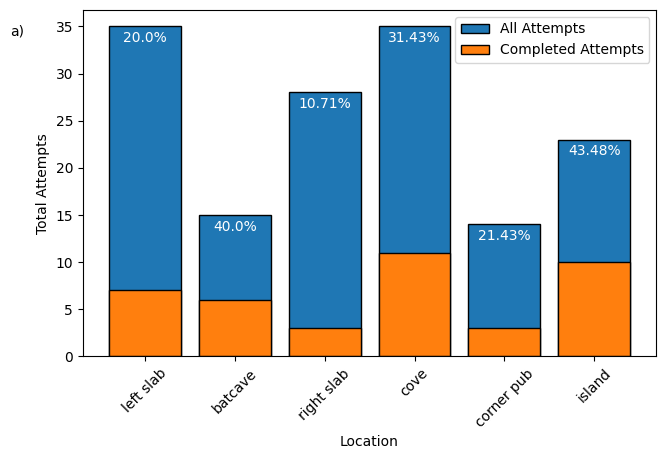

150.0


In [484]:
#Plotting the number of attempts per location with the percentage of completed attempts
plt.figure(figsize=(7.4, 4.5))
plt.bar(locationsOrdered, [attemptsPerLoc[location] for location in locationsOrdered], edgecolor='black', label="All Attempts")
plt.bar(locationsOrdered, [attemptsPerLoc_completed[location] for location in locationsOrdered], edgecolor='black', label="Completed Attempts")
for i in range(len(locationsOrdered)):
    plt.text(i, attemptsPerLoc[locationsOrdered[i]]-2, f"{round(attemptsPerLoc_completed[locationsOrdered[i]]/attemptsPerLoc[locationsOrdered[i]]*100,2)}%", ha='center', va='bottom', color='white')
plt.xlabel('Location')
plt.ylabel('Total Attempts')
plt.xticks(rotation=45) 
plt.text(-1.5, 34, 'a)', fontsize = 10)
plt.legend()
plt.show()

#Checking that the total number of attempts matches the data
countA = 0
for i in range(len(attemptsPerLoc)):
    countA += attemptsPerLoc[locations[i]]
print(countA)

40.0
{'batcave': {'v1-3': 3.0, 'v5-7': 1.0, 'v3-5': 2.0, 'v7-9': 0, 'v1': 0}, 'left slab': {'v1-3': 2.0, 'v5-7': 1.0, 'v3-5': 3.0, 'v7-9': 0, 'v1': 1.0}, 'island': {'v1-3': 7.0, 'v5-7': 1.0, 'v3-5': 2.0, 'v7-9': 0, 'v1': 0}, 'cove': {'v1-3': 7.0, 'v5-7': 0, 'v3-5': 4.0, 'v7-9': 0, 'v1': 0}, 'corner pub': {'v1-3': 1.0, 'v5-7': 0, 'v3-5': 2.0, 'v7-9': 0, 'v1': 0}, 'right slab': {'v1-3': 0, 'v5-7': 1.0, 'v3-5': 2.0, 'v7-9': 0, 'v1': 0}}


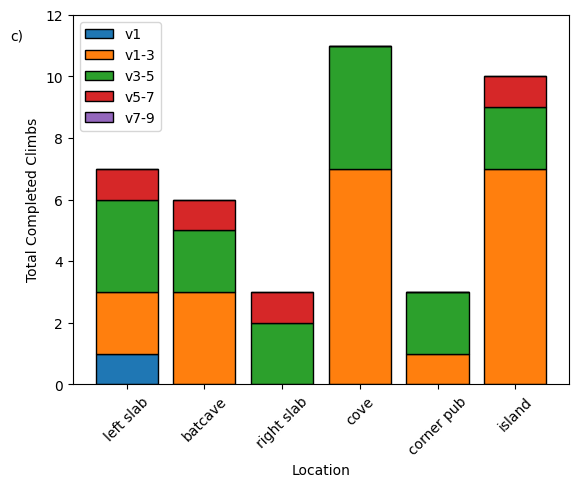

In [485]:
#Separating total climbs into each grade 
completedByLocAndGrade = {location: {grade: 0 for grade in grades} for location in locations}
countB = 0
for row in climbingData:
    if row[3] == 100:
        completedByLocAndGrade[row[5]][row[0]] += row[1]
        countB += row[1]

#Checking that values were read in correctly and match the spreadsheet
print(countB)
print(completedByLocAndGrade)

bottomComplete = [0 for i in range(len(locationsOrdered))]
for i in range(len(gradeOrder)):
    if i == 0:
        #Debugging
        '''print(i)
        print(f"bottom: {bottomComplete}")
        print([completedByLocAndGrade[location][gradeOrder[i]] for location in locationsOrdered], gradeOrder[i], "\n")
        '''
        plt.bar(locationsOrdered, [completedByLocAndGrade[location][gradeOrder[i]] for location in locationsOrdered], edgecolor='black', label=gradeOrder[i])
        bottomComplete = [sum(x) for x in zip(bottomComplete, [completedByLocAndGrade[location][gradeOrder[i-1]] for location in locationsOrdered])]
    else:
        #Debugging
        '''print(i)
        print(f"bottom: {bottomComplete}")
        print([completedByLocAndGrade[location][gradeOrder[i]] for location in locationsOrdered], gradeOrder[i])
        print([completedByLocAndGrade[location][gradeOrder[i-1]] for location in locationsOrdered], gradeOrder[i-1],"\n")
        '''
        bottomComplete = [sum(x) for x in zip(bottomComplete, [completedByLocAndGrade[location][gradeOrder[i-1]] for location in locationsOrdered])]
        plt.bar(locationsOrdered, [completedByLocAndGrade[location][gradeOrder[i]] for location in locationsOrdered], edgecolor='black', label=gradeOrder[i], bottom=bottomComplete)


plt.xlabel('Location')
plt.ylabel('Total Completed Climbs')
plt.xticks(rotation=45)
plt.ylim(0,12)
plt.text(-1.5, 11.2, 'c)', fontsize = 10)
plt.legend()
plt.show()

150.0
{'batcave': {'v1-3': 3.0, 'v5-7': 10.0, 'v3-5': 2.0, 'v7-9': 0, 'v1': 0}, 'left slab': {'v1-3': 2.0, 'v5-7': 28.0, 'v3-5': 4.0, 'v7-9': 0, 'v1': 1.0}, 'island': {'v1-3': 7.0, 'v5-7': 7.0, 'v3-5': 9.0, 'v7-9': 0, 'v1': 0}, 'cove': {'v1-3': 7.0, 'v5-7': 6.0, 'v3-5': 21.0, 'v7-9': 1.0, 'v1': 0}, 'corner pub': {'v1-3': 1.0, 'v5-7': 2.0, 'v3-5': 11.0, 'v7-9': 0, 'v1': 0}, 'right slab': {'v1-3': 0, 'v5-7': 25.0, 'v3-5': 3.0, 'v7-9': 0, 'v1': 0}}


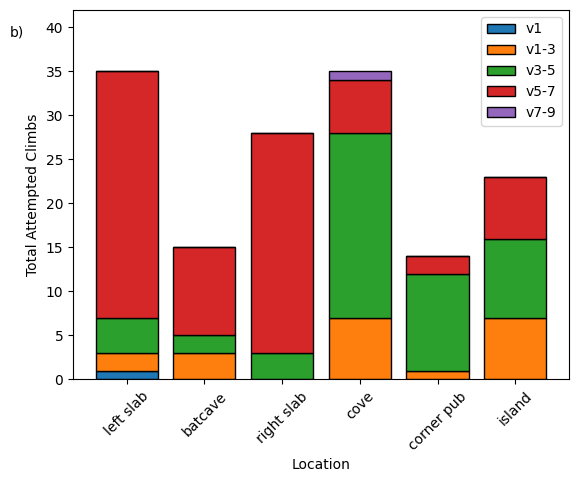

In [486]:
#Separating completed climbs into each grade
attemptByLocAndGrade = {location: {grade: 0 for grade in grades} for location in locations}
count = 0
for row in climbingData:
    if not np.isnan(row[3]):
        attemptByLocAndGrade[row[5]][row[0]] += row[1]
        count +=row[1]

#Checking that values were read in correctly and match the spreadsheet
print(count)
print(attemptByLocAndGrade)


bottomAttempt = [0 for i in range(len(locationsOrdered))]
for i in range(len(gradeOrder)):
    if i == 0:
        #Debugging
        '''print(i)
        print(f"bottom: {bottomAttempt}")
        print([attemptByLocAndGrade[location][gradeOrder[i]] for location in locationsOrdered], gradeOrder[i], "\n")
        '''
        plt.bar(locationsOrdered, [attemptByLocAndGrade[location][gradeOrder[i]] for location in locationsOrdered], edgecolor='black', label=gradeOrder[i], bottom=0)
    else:
        #Debugging
        '''print(i)
        print(f"bottom: {bottomAttempt}")
        print([attemptByLocAndGrade[location][gradeOrder[i]] for location in locationsOrdered], gradeOrder[i])
        print([attemptByLocAndGrade[location][gradeOrder[i-1]] for location in locationsOrdered], gradeOrder[i-1],"\n")
        '''
        bottomAttempt = [sum(x) for x in zip(bottomAttempt, [attemptByLocAndGrade[location][gradeOrder[i-1]] for location in locationsOrdered])]
        plt.bar(locationsOrdered, [attemptByLocAndGrade[location][gradeOrder[i]] for location in locationsOrdered], edgecolor='black', label=gradeOrder[i], bottom=bottomAttempt)

plt.xlabel('Location')
plt.ylabel('Total Attempted Climbs')
plt.xticks(rotation=45)
plt.text(-1.5, 39, 'b)', fontsize = 10)
plt.legend(loc=1)
plt.ylim(0,42)
plt.show()

In [487]:
#Calculating percentage of completed climbs in each location per grade
percentByLocAndGrade = {location: {} for location in completedByLocAndGrade}

for location in completedByLocAndGrade:
    for grade in completedByLocAndGrade[location]:
        completed = completedByLocAndGrade[location][grade]
        attempted = attemptByLocAndGrade[location][grade]
        if attempted > 0:
            percentByLocAndGrade[location][grade] = (completed / attempted) * 100
        else:
            percentByLocAndGrade[location][grade] = 0

#Printing values
for location, grades in percentByLocAndGrade.items():
    print(f'Location: {location}')
    for grade, percentage in grades.items():
        print(f'{grade}: {percentage:.2f}%')



Location: batcave
v1-3: 100.00%
v5-7: 10.00%
v3-5: 100.00%
v7-9: 0.00%
v1: 0.00%
Location: left slab
v1-3: 100.00%
v5-7: 3.57%
v3-5: 75.00%
v7-9: 0.00%
v1: 100.00%
Location: island
v1-3: 100.00%
v5-7: 14.29%
v3-5: 22.22%
v7-9: 0.00%
v1: 0.00%
Location: cove
v1-3: 100.00%
v5-7: 0.00%
v3-5: 19.05%
v7-9: 0.00%
v1: 0.00%
Location: corner pub
v1-3: 100.00%
v5-7: 0.00%
v3-5: 18.18%
v7-9: 0.00%
v1: 0.00%
Location: right slab
v1-3: 0.00%
v5-7: 4.00%
v3-5: 66.67%
v7-9: 0.00%
v1: 0.00%


2.168915662650602 2.3328571428571427


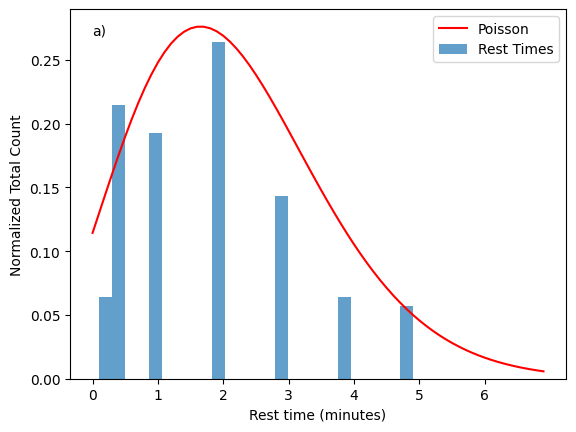

In [488]:
import scipy

#Plotting normalized total rest times and fitting a Poisson distribution to the average  
restTimeC=[]
restTime=[]
#Added weights to account for attempt number cloumn
weightsC=[]
weights=[]

for row in climbingData:
    if not np.isnan(row[4]):
        restTime.append(row[4])
        weights.append(row[1])
    if row[3]==100 and not np.isnan(row[4]):
        restTimeC.append(row[4])
        weightsC.append(row[1])


muA = np.mean(restTime)
muC = np.mean(restTimeC)
print(muA, muC)

countsA, binEdgesA = np.histogram(restTime, bins=25, weights=weights)
pdf = countsA/sum(countsA)
plt.plot(np.arange(0,7,0.1), [muA**i/scipy.special.factorial(i)*np.exp(-muA) for i in np.arange(0,7,0.1)], label="Poisson", color='red')
plt.bar(binEdgesA[:-1], pdf, width=0.2, alpha=0.7, align='center', label="Rest Times")
plt.xticks([0,1,2,3,4,5, 6])
plt.xlabel('Rest time (minutes)')
plt.ylabel('Normalized Total Count')
plt.text(0, 0.27, 'a)', fontsize = 10)
plt.legend()
plt.show()


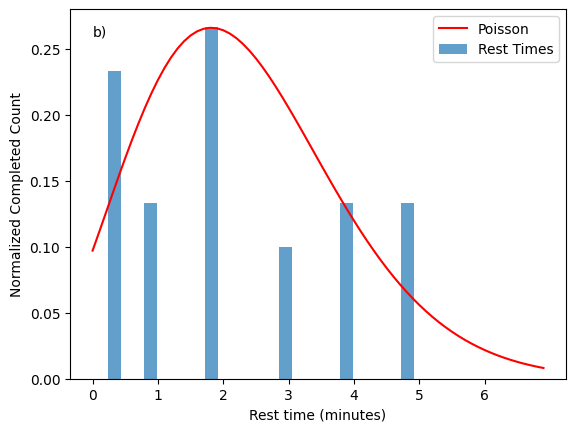

In [489]:
#Plotting normalized complete rest times and fitting a Poisson distribution to the average  
countsC, binEdgesC = np.histogram(restTimeC, bins=25, weights=weightsC)
pdfC = countsC/sum(countsC)
plt.plot(np.arange(0,7,0.1), [muC**i/scipy.special.factorial(i)*np.exp(-muC) for i in np.arange(0,7,0.1)], label="Poisson", color='red')
plt.bar(binEdgesC[:-1], pdfC, width=0.2, alpha=0.7, align='center', label="Rest Times")
plt.xticks([0,1,2,3,4,5, 6])
plt.xlabel('Rest time (minutes)')
plt.ylabel('Normalized Completed Count')
plt.text(0, 0.26, 'b)', fontsize = 10)
plt.legend()
plt.show()

2.647777777777778 2.1064285714285718 2.75


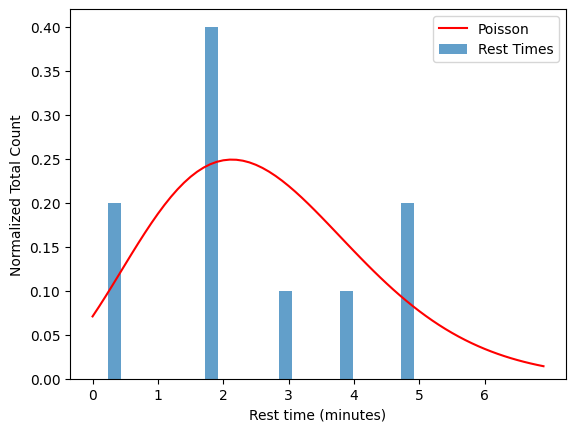

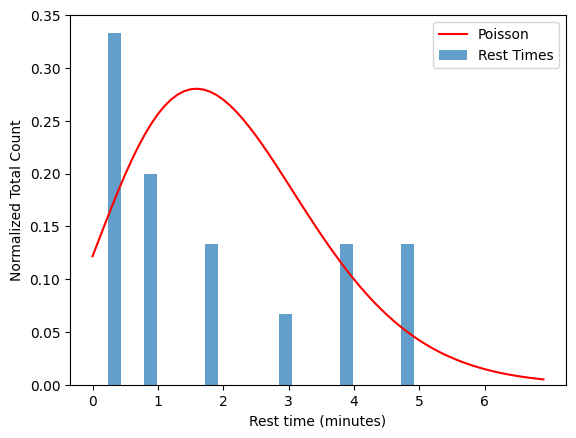

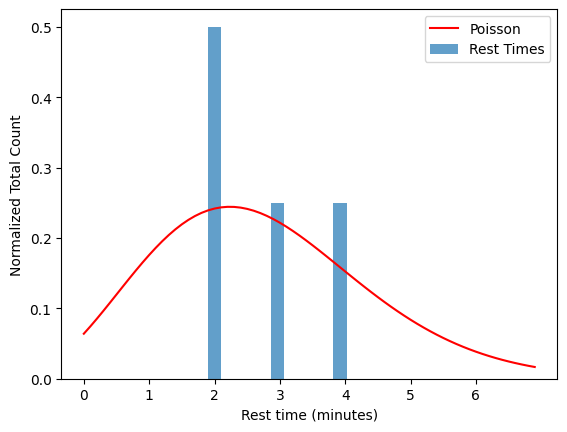

In [490]:
#Additional plots not used in report but show the rest times for individual grade ranges
restTimev7=[]
restTimev5=[]
restTimev3=[]
weightsv7=[]
weightsv5=[]
weightsv3=[]
for row in climbingData:
    if row[3]==100 and row[0]=="v1-3" and not np.isnan(row[4]):
        restTimev3.append(row[4])
        weightsv3.append(row[1])
    if row[3]==100 and row[0]=="v3-5" and not np.isnan(row[4]):
        restTimev5.append(row[4])
        weightsv5.append(row[1])
    if row[3]==100 and row[0]=="v5-7" and not np.isnan(row[4]):
        restTimev7.append(row[4])
        weightsv7.append(row[1])


mu3 = np.mean(restTimev3)
mu5 = np.mean(restTimev5)
mu7 = np.mean(restTimev7)
print(mu3, mu5, mu7)

counts3, binEdges3 = np.histogram(restTimev3, bins=25, weights=weightsv3)
counts5, binEdges5 = np.histogram(restTimev5, bins=25, weights=weightsv5)
counts7, binEdges7 = np.histogram(restTimev7, bins=25, weights=weightsv7)

pdf3 = counts3/sum(counts3)
pdf5 = counts5/sum(counts5)
pdf7 = counts7/sum(counts7)

plt.plot(np.arange(0,7,0.1), [mu3**i/scipy.special.factorial(i)*np.exp(-mu3) for i in np.arange(0,7,0.1)], label="Poisson", color='red')
plt.bar(binEdges3[:-1], pdf3, width=0.2, alpha=0.7, align='center', label="Rest Times")
plt.xticks([0,1,2,3,4,5, 6])
plt.xlabel('Rest time (minutes)')
plt.ylabel('Normalized Total Count')
plt.legend()
plt.show()

plt.plot(np.arange(0,7,0.1), [mu5**i/scipy.special.factorial(i)*np.exp(-mu5) for i in np.arange(0,7,0.1)], label="Poisson", color='red')
plt.bar(binEdges5[:-1], pdf5, width=0.2, alpha=0.7, align='center', label="Rest Times")
plt.xticks([0,1,2,3,4,5, 6])
plt.xlabel('Rest time (minutes)')
plt.ylabel('Normalized Total Count')
plt.legend()
plt.show()

plt.plot(np.arange(0,7,0.1), [mu7**i/scipy.special.factorial(i)*np.exp(-mu7) for i in np.arange(0,7,0.1)], label="Poisson", color='red')
plt.bar(binEdges7[:-1], pdf7, width=0.2, alpha=0.7, align='center', label="Rest Times")
plt.xticks([0,1,2,3,4,5, 6])
plt.xlabel('Rest time (minutes)')
plt.ylabel('Normalized Total Count')
plt.legend()
plt.show()

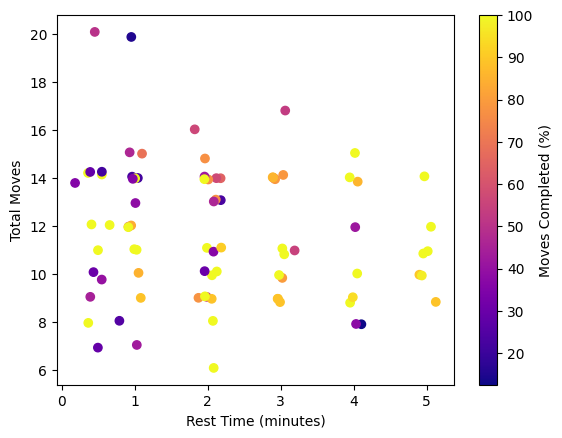

In [491]:
#Not used in report 
plt.scatter(climbingData[:,4]+np.random.normal(0, 0.1, size=climbingData[:, 4].shape), climbingData[:,2]+np.random.normal(0, 0.1, size=climbingData[:, 2].shape), c=climbingData[:,3], cmap='plasma')
plt.xlabel('Rest Time (minutes)')
plt.ylabel('Total Moves')
cbar = plt.colorbar()
cbar.set_label('Moves Completed (%)')
plt.show()

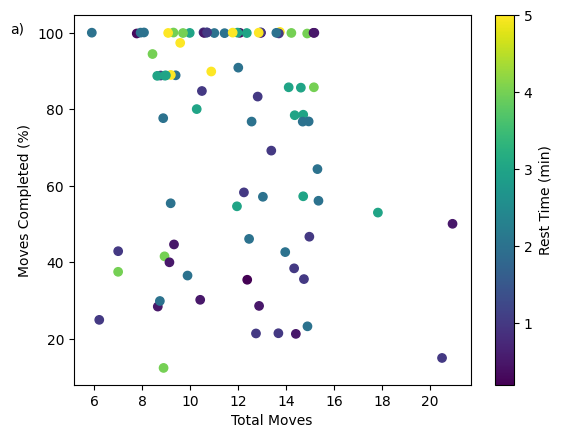

In [492]:
#Not used in report
plt.scatter(climbingData[:,2]+np.random.normal(0, 1, size=climbingData[:, 2].shape), climbingData[:,3]+np.random.normal(0, 0.1, size=climbingData[:, 3].shape), c=climbingData[:,4], cmap='viridis')
plt.ylabel('Moves Completed (%)')
plt.xlabel('Total Moves')   
cbar = plt.colorbar()
cbar.set_label('Rest Time (min)')
plt.text(2.5, 100, 'a)', fontsize = 10)
plt.show()

1
19
31
41
1


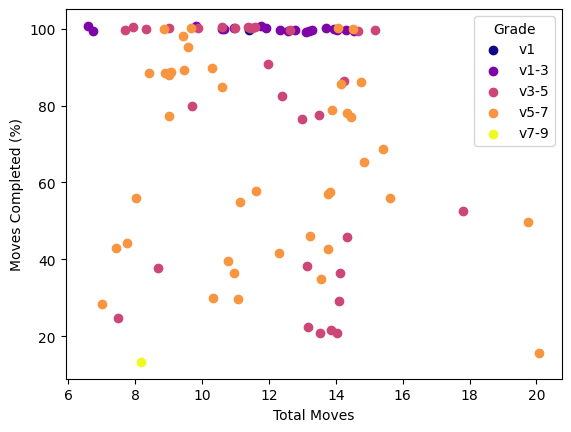

In [493]:
#Not used in report
colors = plt.cm.get_cmap('plasma' , len(gradeOrder))
grade_to_color = {grade: colors(i) for i, grade in enumerate(gradeOrder)}
for grade in gradeOrder:
    mask = climbingData[:, 0] == grade
    plt.scatter(climbingData[mask, 2]+np.random.normal(0, 0.5, size=climbingData[mask, 2].shape), climbingData[mask, 3]+np.random.normal(0, 0.5, size=climbingData[mask, 3].shape), label=f'{grade}', color=grade_to_color[grade])
    print(len(climbingData[mask, 0]))

plt.xlabel('Total Moves')
plt.ylabel('Moves Completed (%)')
plt.legend(title='Grade')
plt.show()

1
19
31
41
1


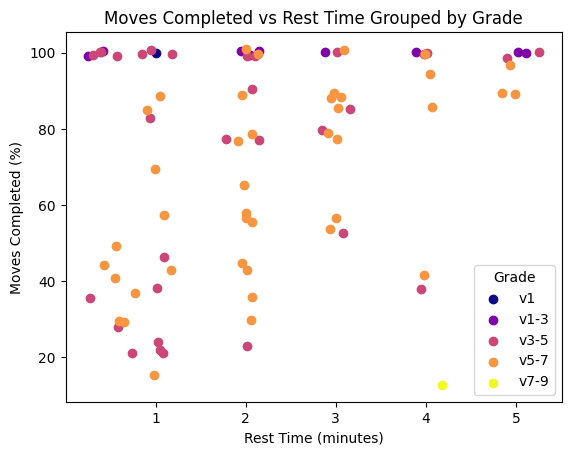

In [494]:
#Not used in report
colours = plt.cm.get_cmap('plasma' , len(gradeOrder))
gradeToColour = {grade: colours(i) for i, grade in enumerate(gradeOrder)}
for grade in gradeOrder:
    mask = climbingData[:, 0] == grade
    plt.scatter(climbingData[mask, 4]+np.random.normal(0, 0.1, size=climbingData[mask, 4].shape), climbingData[mask, 3]+np.random.normal(0, 0.5, size=climbingData[mask, 3].shape), label=f'{grade}', color=gradeToColour[grade])
    print(len(climbingData[mask, 0]))

plt.xlabel('Rest Time (minutes)')
plt.ylabel('Moves Completed (%)')
plt.legend(title='Grade')
plt.title('Moves Completed vs Rest Time Grouped by Grade')
plt.show()

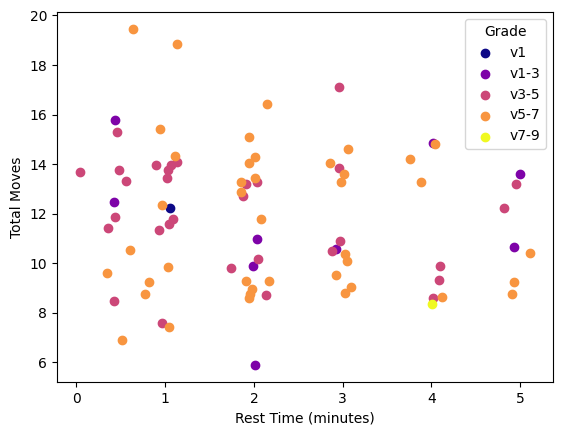

In [495]:
#Not used in report
colours = plt.cm.get_cmap('plasma', len(gradeOrder))
gradeToColour = {grade: colours(i) for i, grade in enumerate(gradeOrder)}
for grade in gradeOrder:
    mask = climbingData[:, 0] == grade
    plt.scatter(climbingData[mask, 4]+np.random.normal(0, 0.1, size=climbingData[mask, 4].shape), climbingData[mask, 2]+np.random.normal(0, 0.5, size=climbingData[mask, 2].shape), label=f'{grade}', color=gradeToColour[grade])

plt.xlabel('Rest Time (minutes)')
plt.ylabel('Total Moves')
plt.legend(title='Grade')
plt.show()

83 83 83 83


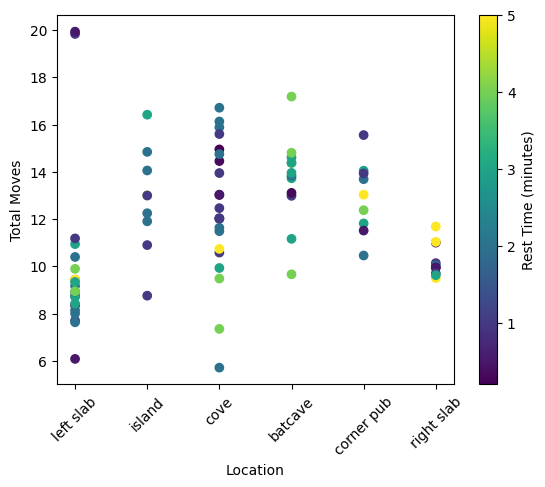

In [496]:
#Not used in report
restTimeC=[]
restTime=[]
locationRest=[]
movesRest=[]
totalMoves=[]
for row in climbingData:
    if not np.isnan(row[4]):
        restTime.append(row[4])
        locationRest.append(row[5])
        movesRest.append(row[3])
        totalMoves.append(row[2])
    if row[3]==100 and not np.isnan(row[4]):
        restTimeC.append(row[4])
print(len(restTime), len(locationRest), len(movesRest), len(totalMoves))

plt.scatter(locationRest, np.array(totalMoves)+np.random.normal(0, 1, size=np.array(totalMoves).shape), c=restTime, cmap='viridis')
plt.xlabel('Location')
plt.ylabel('Total Moves')   
cbar = plt.colorbar()
cbar.set_label('Rest Time (minutes)')
plt.xticks(rotation=45)
plt.show()

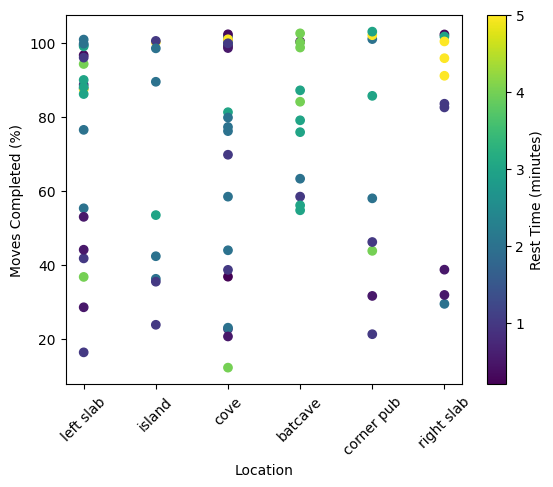

In [497]:
#Plotting the percentage of moves completed in each location coloured by the rest time
plt.scatter(locationRest, np.array(movesRest)+np.random.normal(0, 1.5, size=np.array(movesRest).shape), c=restTime, cmap='viridis')
plt.xlabel('Location')
plt.ylabel('Moves Completed (%)')   
cbar = plt.colorbar()
cbar.set_label('Rest Time (minutes)')
plt.xticks(rotation=45)
plt.show()

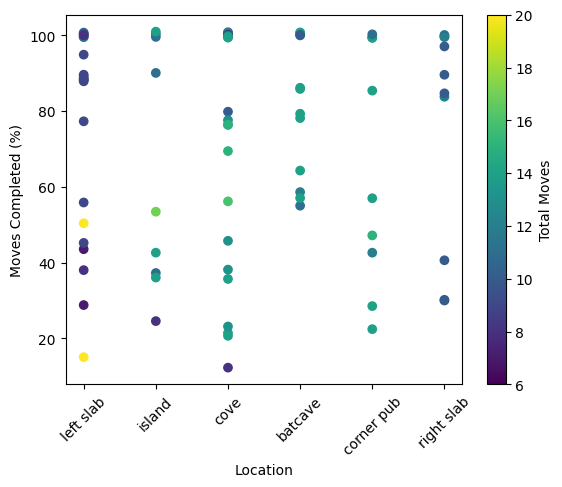

In [498]:
plt.scatter(locationRest, np.array(movesRest)+np.random.normal(0, 0.5, size=np.array(movesRest).shape), c=totalMoves, cmap='viridis')
plt.xlabel('Location')
plt.ylabel('Moves Completed (%)')   
cbar = plt.colorbar()
cbar.set_label('Total Moves')
plt.xticks(rotation=45)
plt.show()

In [501]:
#Calculate the average rest time in each range of move completion

ranges = [(0, 25), (25, 50), (50, 75), (75, 100)]

avgRestTimes = {f'{low}-{high}%': 0 for low, high in ranges}
counts = {f'{low}-{high}%': 0 for low, high in ranges}

for row in climbingData:
    for low, high in ranges:
        if low < row[3] <= high and not np.isnan(row[4]):
            range_key = f'{low}-{high}%'
            avgRestTimes[range_key] += row[1]*row[4]
            counts[range_key] += row[1]
            

#Debugging
#print(avgRestTimes, counts)

for range_key in avgRestTimes:
    if counts[range_key] > 0:
        avgRestTimes[range_key] /= counts[range_key]

for range_key, avg_rest_time in avgRestTimes.items():
    print(f'Average rest time for {range_key}: {avg_rest_time:.2f} minutes')

Average rest time for 0-25%: 1.15 minutes
Average rest time for 25-50%: 1.05 minutes
Average rest time for 50-75%: 2.14 minutes
Average rest time for 75-100%: 2.56 minutes
